In [48]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [49]:
data = pd.read_csv("COVID-19-time-series-clean-complete.csv")
data.head(10)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,2020-01-22,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,2020-01-22,Albania,0,0,0.0,0.0,0,0,0
2,2,2020-01-22,Algeria,0,0,0.0,0.0,0,0,0
3,3,2020-01-22,Andorra,0,0,0.0,0.0,0,0,0
4,4,2020-01-22,Angola,0,0,0.0,0.0,0,0,0
5,5,2020-01-22,Antigua and Barbuda,0,0,0.0,0.0,0,0,0
6,6,2020-01-22,Argentina,0,0,0.0,0.0,0,0,0
7,7,2020-01-22,Armenia,0,0,0.0,0.0,0,0,0
8,8,2020-01-22,Australia,0,0,0.0,0.0,0,0,0
9,9,2020-01-22,Austria,0,0,0.0,0.0,0,0,0


## preprocess "Date" column format :

In [50]:
data["Date"] = pd.to_datetime(data["Date"])
data["Date"] = data["Date"].map(lambda date : date.year * 100 + date.month)
data.head(10)

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,202001,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,202001,Albania,0,0,0.0,0.0,0,0,0
2,2,202001,Algeria,0,0,0.0,0.0,0,0,0
3,3,202001,Andorra,0,0,0.0,0.0,0,0,0
4,4,202001,Angola,0,0,0.0,0.0,0,0,0
5,5,202001,Antigua and Barbuda,0,0,0.0,0.0,0,0,0
6,6,202001,Argentina,0,0,0.0,0.0,0,0,0
7,7,202001,Armenia,0,0,0.0,0.0,0,0,0
8,8,202001,Australia,0,0,0.0,0.0,0,0,0
9,9,202001,Austria,0,0,0.0,0.0,0,0,0


### A. Print the names of the 8 countries with highest corona patients in the fourth month of 2020.


In [51]:
data["Date"] = data["Date"].to_numpy(str)
april_data = data[['Country/Region' , 'Date' ,'Active']].query(" Date == '202004' ").reset_index()
april_data


,index,Country/Region,Date,Active
0,13510,Afghanistan,202004,188.0
1,13511,Albania,202004,177.0
2,13512,Algeria,202004,728.0
3,13513,Andorra,202004,366.0
4,13514,Angola,202004,5.0
...,...,...,...,...
5785,19295,Vietnam,202004,51.0
5786,19296,West Bank and Gaza,202004,266.0
5787,19297,Yemen,202004,3.0
5788,19298,Zambia,202004,48.0


In [52]:
df = april_data.groupby(["Country/Region" , "Date"])["Active"].sum().reset_index()
df

,Country/Region,Date,Active
0,Afghanistan,202004,23257.0
1,Albania,202004,7002.0
2,Algeria,202004,36228.0
3,Andorra,202004,12553.0
4,Angola,202004,412.0
...,...,...,...
188,Vietnam,202004,2772.0
189,West Bank and Gaza,202004,6839.0
190,Yemen,202004,28.0
191,Zambia,202004,892.0


In [53]:

df = df.sort_values( by = ["Active"] , ascending=False).head(8).reset_index()
df


,index,Country/Region,Date,Active
0,179,US,202004,17142781.0
1,84,Italy,202004,3017835.0
2,183,United Kingdom,202004,2856248.0
3,162,Spain,202004,2621463.0
4,61,France,202004,2028962.0
5,178,Turkey,202004,1671945.0
6,65,Germany,202004,1636325.0
7,142,Russia,202004,1023297.0


Text(0.5, 1.0, '8 highest corona patients countries in April.')

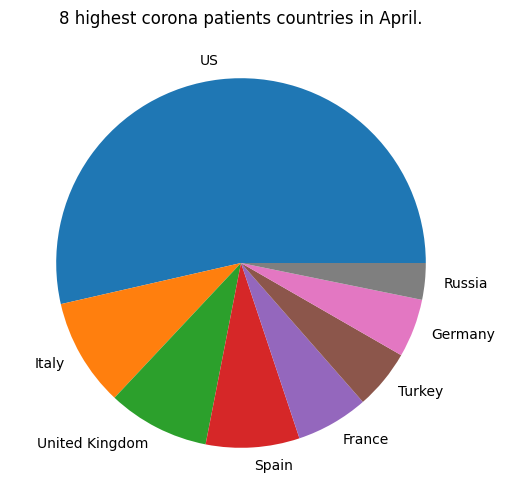

In [54]:
plt.figure(figsize=(12,6))
plt.pie(df["Active"] , labels=df["Country/Region"] )
plt.grid()
plt.title("8 highest corona patients countries in April.")

# B. Plot the death rate in Iran on different days.

In [68]:
# preprocess
data = pd.read_csv("COVID-19-time-series-clean-complete.csv")

data["Date"] = pd.to_datetime(data["Date"])
data["Date"] = data["Date"].map(lambda date : date.year * 10000 + date.month * 100 +  date.day)
data.head()

,Unnamed: 0,Date,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered
0,0,20200122,Afghanistan,0,0,0.0,0.0,0,0,0
1,1,20200122,Albania,0,0,0.0,0.0,0,0,0
2,2,20200122,Algeria,0,0,0.0,0.0,0,0,0
3,3,20200122,Andorra,0,0,0.0,0.0,0,0,0
4,4,20200122,Angola,0,0,0.0,0.0,0,0,0


In [72]:
data["Country"] = data["Country/Region"].to_numpy(str)

total_death_number =  93086
data["death_rate"] = ( data["New deaths"].to_numpy(int) / total_death_number ) * 100 

iran_data = data[["Date" ,"Country", "New deaths" , "Recovered" , "Deaths" , "death_rate"]].query(" Country == 'Iran' ").dropna().reset_index()
iran_data


,index,Date,Country,New deaths,Recovered,Deaths,death_rate
0,80,20200122,Iran,0,0.0,0,0.000000
1,273,20200123,Iran,0,0.0,0,0.000000
2,466,20200124,Iran,0,0.0,0,0.000000
3,659,20200125,Iran,0,0.0,0,0.000000
4,852,20200126,Iran,0,0.0,0,0.000000
...,...,...,...,...,...,...,...
558,107774,20210802,Iran,411,3404533.0,91407,0.441527
559,107967,20210803,Iran,378,3424650.0,91785,0.406076
560,108160,20210804,Iran,409,3444798.0,92194,0.439379
561,108353,20210805,Iran,434,0.0,92628,0.466236


Text(0, 0.5, 'death_rate')

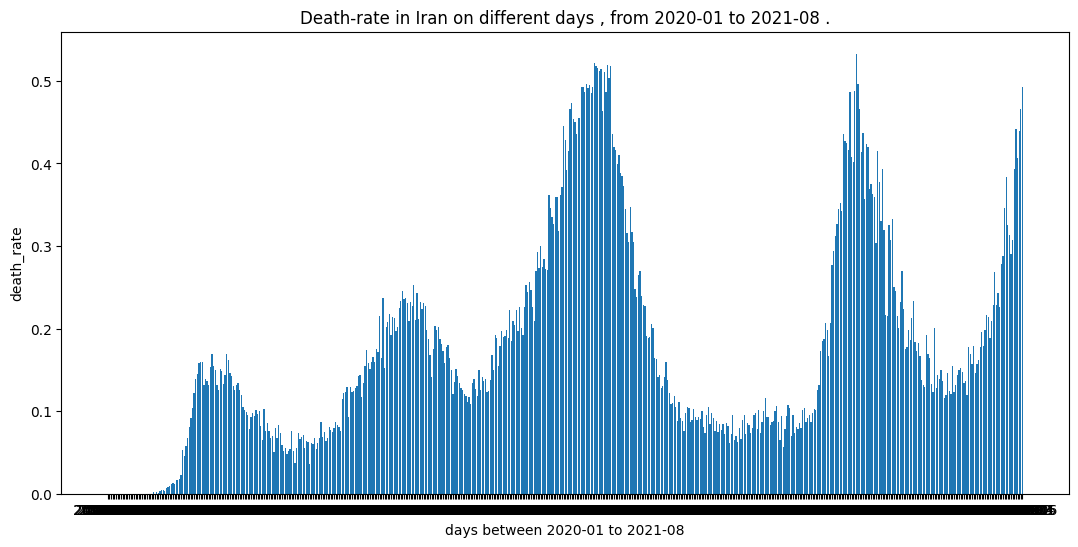

In [78]:
plt.figure(figsize=(13,6))
plt.bar(iran_data["Date"].to_numpy(str) , iran_data["death_rate"].to_numpy() )
plt.title("Death-rate in Iran on different days , from 2020-01 to 2021-08 .")
plt.xlabel("days between 2020-01 to 2021-08")
plt.ylabel("death_rate")